# 📝  Overfitting


![figure](assets/figures/overfitting.jpeg)


This might be a comfy bed for you, but I don't know if your friend would like to sleep on it ☺️


- It is possible to get perfect accuracy on a test set but cannot conduct inference on a new problem
- The model is not **generalizable**


A model can classify types of apples but show it an orange and it is useless


## Overfitting Example with Polynomials


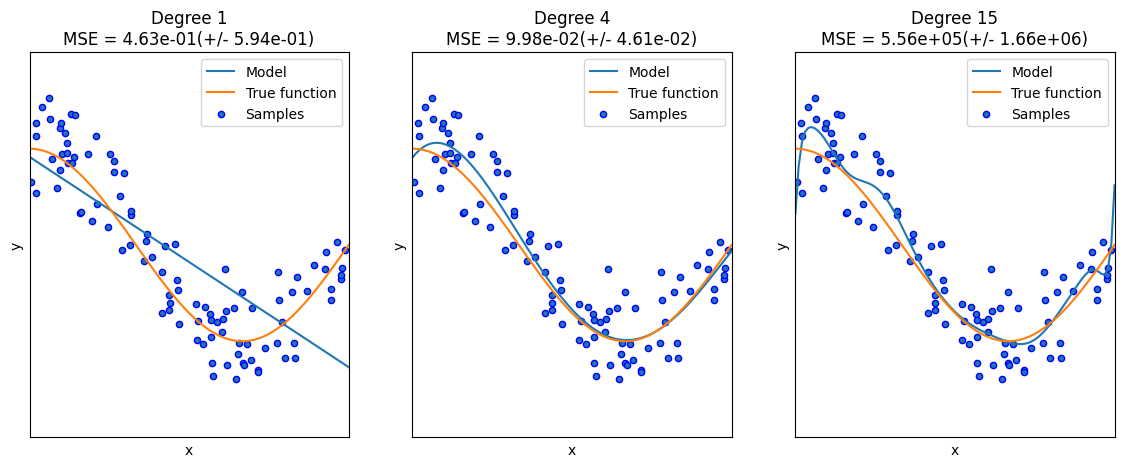

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Defines the function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# sets a random seed for consistent plotting
np.random.seed(0)

# sets the number of samples
n_samples = 100

# Sets the range in degrees
degrees = [1, 4, 15]

# adds some noise to the data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

# does the plotting
plt.figure(figsize=(14, 5))

# Loops around the number of degrees selected
for i in range(len(degrees)):

    # makes the subplot
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # creates the polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    # Least squares linear regression
    linear_regression = LinearRegression()

    # establishes a fitting pipeline
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    # does the fit
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    # Defines a linear vector
    X_test = np.linspace(0, 1, 100)

    # plots the real model
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")

    # plots the generated data
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

    # sets the axes format
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )